# <font color=blue>**PROYECTO FINAL - CLASIFICACIÓN BINARIA (HUNDIMIENTO DE TITANIC)** 

## <font color=blue>**PARTE 2: Deployment , inferencia y predicción**

In [1]:
import numpy as np
import imageio as imio
import matplotlib.pyplot as plt
import seaborn as sns
import datetime, os
import tensorflow as tf
import pandas as pd
import statistics as st
from sklearn import datasets
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression as LR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
import statsmodels.api as sm
import pylab as py
from sklearn.preprocessing import PowerTransformer
import csv
from joblib import dump, load
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn import metrics
import datetime, os
import Ipynb_importer

In [2]:
import NaivePredict
import RLogistica

<font color=blue>**1.1. Carga Modelos**

In [4]:
fn1="DTC_Criterio=entropy_Depth=20_Variables=['Age' 'SibSp' 'Parch' 'Fare' 'Embarked_FE' 'passenger_class_FE' 'passenger_sex_FE']_P=1.00_C=0.96_F1=0.98_A=0.98"
dtc = load(fn1+".joblib", mmap_mode="r")

In [6]:
fn2= "SVM__Kernel=rbf_Gamma= _Variables=['Age' 'SibSp' 'Parch' 'Fare' 'Embarked_FE' 'passenger_class_FE' 'passenger_sex_FE']_P=0.93_C=0.64_F1=0.76_A=0.85"
svm =load(fn2+".joblib", mmap_mode="r")

In [8]:
fn3 = "NaiveBayes_Variables=['Age' 'SibSp' 'Parch' 'Fare' 'Embarked_FE' 'passenger_class_FE' 'passenger_sex_FE']_P=0.69_C=0.71_F1=0.70_A=0.77"
nb  =load(fn3+".joblib", mmap_mode="r")

In [11]:
fn4= "RL_Regularizacion=0.5_Solver=liblinear_Variables=['Age' 'SibSp' 'Parch' 'Fare' 'Embarked_FE' 'passenger_class_FE' 'passenger_sex_FE']_P=0.75_C=0.67_F1=0.71_A=0.79"
rl =load(fn4+".joblib", mmap_mode="r")

In [12]:
fn5= "RL_lr=0.0001batch=300epoch=5"
rl2 =load(fn5+".joblib", mmap_mode="r")

In [25]:
rl2[0].T

memmap([[-1.07663452e-05,  1.48112471e-05,  1.98681179e-05,
          4.37182960e-05, -1.33716493e-05, -3.96543219e-05,
         -6.83390580e-05, -3.77836640e-05]])

In [26]:
def Ensemble_Predict(X,dtc, svm, nb, rl,rl2):
    
    ad_t = dtc.predict(X)
    sv_t = svm.predict(X)
    n_t = NaivePredict.Naive_Predict(X, nb[0],nb[1],nb[2],nb[3])
    rlm_t = RLogistica.ModeloRegresionLogistica_Predict(X,rl2[1],rl2[0])
    rl_t = rl.predict(X)
    
    final_m = pd.DataFrame({'Arbol': ad_t,'SVM': sv_t,'Naive': n_t,'Regresion': rl_t})
    
    moda = final_m.mode(axis=1)
    Y_hat = moda[0]
      
    plt.figure(figsize=(20,20))    
    tree.plot_tree(dtc,fontsize=10,max_depth=4) 
    plt.show()
    
    return Y_hat

In [19]:
X = np.array([[0.980192, -0.679850, 1.729206, 1.393256,-1.592699,-1.024525,-1.355574 ]])  #Data index 523 set Test
X1 = np.array([[0.471832,-0.679850,-0.560253,0.948144,-1.592699,-1.024525,0.737695]])     #Data index 583 set Test

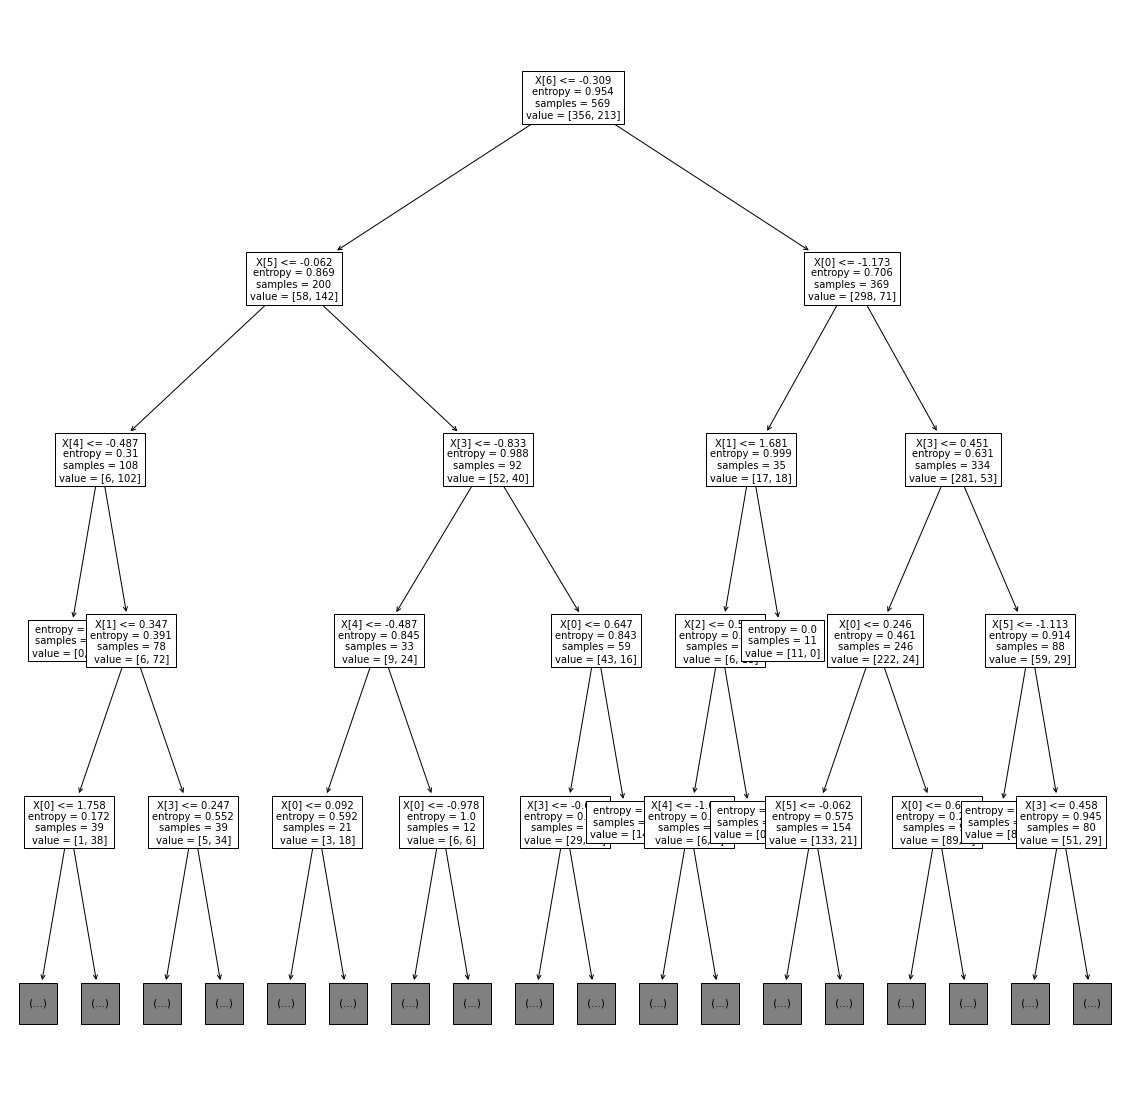

0    N
Name: 0, dtype: object

In [27]:
Ensemble_Predict(X1,dtc, svm, nb, rl,rl2)

In [29]:
X10 = np.array([[0.980192, -0.679850, 1.729206, 1.393256, -1.592699, -1.024525, -1.355574],
                [1.997635,-0.679850,-0.560253,-0.870873,-1.662553,0.901008,0.737695  ],
                [-0.558327, -0.679850, -0.560253, -0.214941, 0.619216 , 0.901008, 0.737695],
                [1.587552,1.373636,-0.560253,1.671045,-1.592699,-1.024525,-1.355574   ],
                [0.471832,-0.679850,-0.560253,0.948144,-1.592699, -1.024525,0.737695   ],
                [0.728843, 1.373636,-0.560253,-0.665469,0.619216,0.901008, -1.355574  ],
                [0.006024,-0.679850,-0.560253,0.605100,0.619216, -1.024525,0.737695 ],
                [1.165361,1.373636,-0.560253,-0.218379,-1.592699,0.901008,-1.355574 ],
                [-0.131450,-0.679850,-0.560253,-0.863376,0.619216 ,0.901008,0.737695  ],
                [-0.485499,-0.679850,-0.560253,-0.938323,-1.592699,0.901008, 0.737695  ]
               ]) 
#X_Test indexes 523,778,760,496,583,40,782,240,146,60

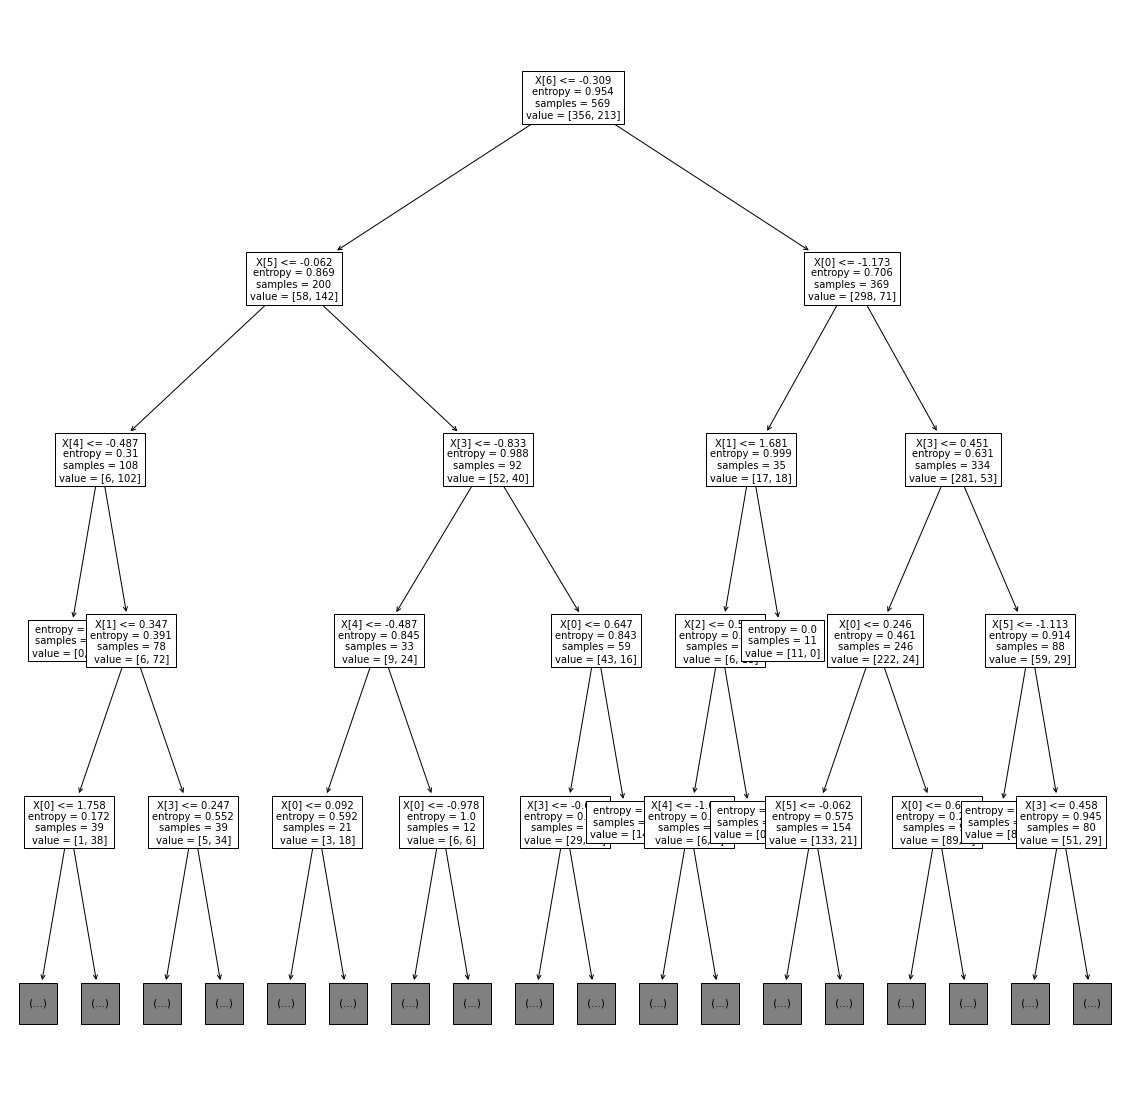

0    Y
1    N
2    N
3    Y
4    N
5    N
6    N
7    N
8    N
9    N
Name: 0, dtype: object

In [30]:
Ensemble_Predict(X10,dtc, svm, nb, rl,rl2)